## Atividade 01 - Parte 01 - Inventário de emissões utilizando Python
Alunas: Marilia Meister e Maria Natalia 

Professor: Leonardo Hoinaski
## Abrindo planilha de fatores de emissões compilada.
Nosso empreendimento é a Porto Bello, do ramo de revestiemnto cerâmico. Portanto usamos o capítulo 11.7 da AP42 https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf


In [2]:
# Utilizando Pandas para abrir a planilha
import pandas as pd # importar a biblioteca Pandas e se referir a ela como pd em seu código
import os #Ao importar o 'os' com import os, posso usar as funções do 'os' no código

# Coletando o caminho da pasta que estou
cwd = os.getcwd() #retorna uma string que representa o caminho absoluto para a pasta (diretório) em que o seu script Python está sendo executado no momento

# Pasta dos fatores de emissão
path = cwd +'\\tabelas\\FE' #deverá conter o caminho completo para a pasta dos fatores de emissão, utilizando a estrutura de diretórios especificada
print(path)
print('')

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)
print('')

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file, sep=",")
display(fe) # a função 'display' exibe um DataFrame 'fe' na tela. Mostrará os dados do arquivo CSV no formato de tabela

#Obs.: Os dados na tabela estão na unidade [kg/Mg] ou também pode ser entendido como [kg/ton]

#Significado das siglas da coluna Source:

#CRM = Britagem da Matéria Prima
#DRY = Secador
#COOLER = Resfriador
#SPRAY_DRYER = Granulação - secador por spray a gás natural (Venturi)
#FIRING = Queima a gás natural
#REFIRING = Refrigeração - forno a gás natural
#SPRAY_BOOTH = Cabine de pulverização de esmalte cerâmico (descontrolado)

C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\tabelas\FE

chp_11_7.csv



,Source,PM,S02,NOX
0,CRM,0.0600,NaN,NaN
1,DRAY,1.1500,NaN,NaN
2,COOLER,0.0550,NaN,NaN
3,SPRAY_DRYER,0.0950,NaN,NaN
4,FIRING,0.2450,NaN,0.27
5,REFIRING,0.0335,NaN,NaN
6,SPRAY_BOOTH,0.0950,NaN,NaN


1589648.9695
1
2
3


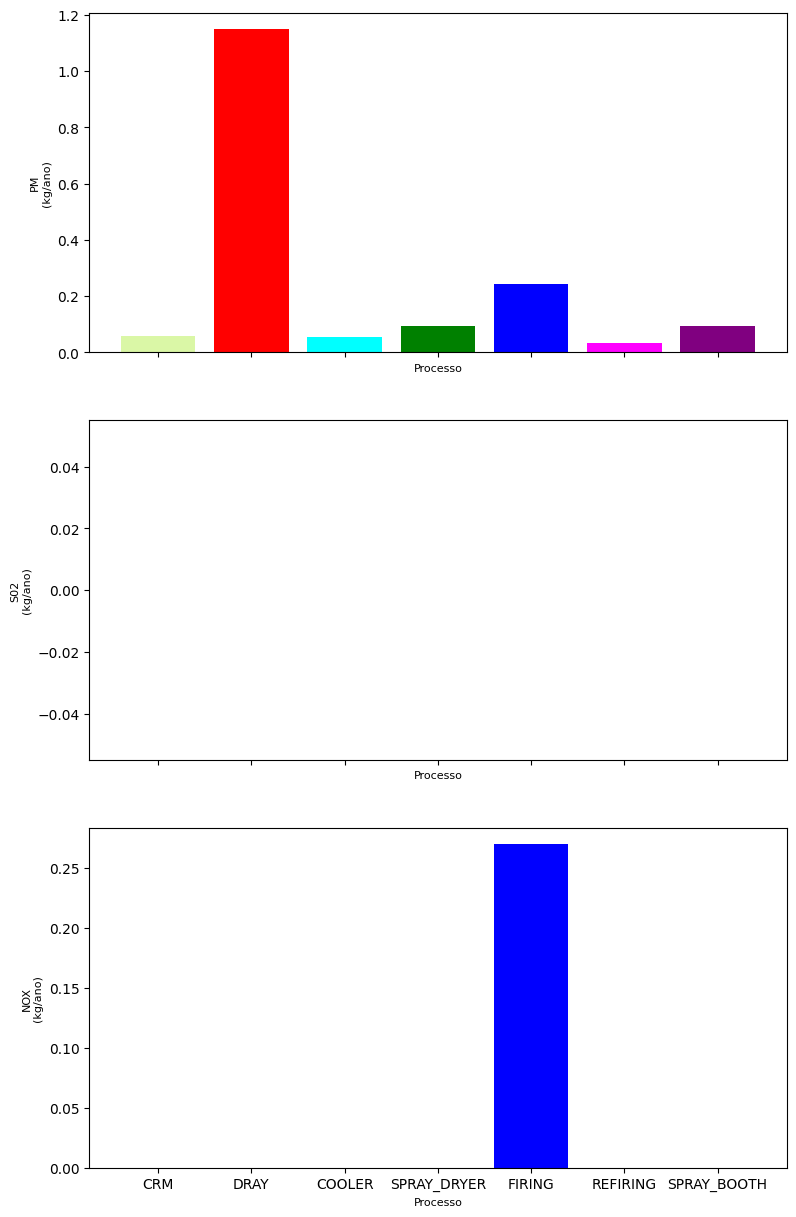

In [4]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt #criar visualizações gráficas, como gráficos e plots.

atv = 917017 # a taxa de atividade está na unidade [ton/ano]
emis = fe['PM']*atv #o resultado da emissão ficará na unidade [kg/ton]*[ton/ano] = [kg/ano]

#Somando dataframe
print(emis.sum()) #Calcula e imprime a soma total das emissões ao longo de todos os registros do DataFrame emis. 
                  #Isso representa a quantidade total de poluente emitida em kg/ano de Material Particulado



# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(9, 15)) #essa linha de código está preparando a estrutura para plotar os dados de cada 
                                                                        #poluente em um subplot separado, todos compartilhando o mesmo eixo x.

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)): #  Este loop for itera sobre os números de 1 até o número de colunas em fe (len(fe.columns)). O uso de range(1, len(fe.columns)) exclui a primeira coluna
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan', 'green', 'blue', 'magenta','purple'])
    ax[ii-1].set_xlabel('Processo', fontsize=8) #fontsize=8 é um argumento usado para definir o tamanho da fonte
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/ano)', fontsize=8)

# Salva a figura na pasta figures - criar a pasta antes!! (obs.: após certifizar-se que o código está correto, liberar essa linha para salvar)
#fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

## Criando taxa de atividade aleatória com sazonalidade

Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

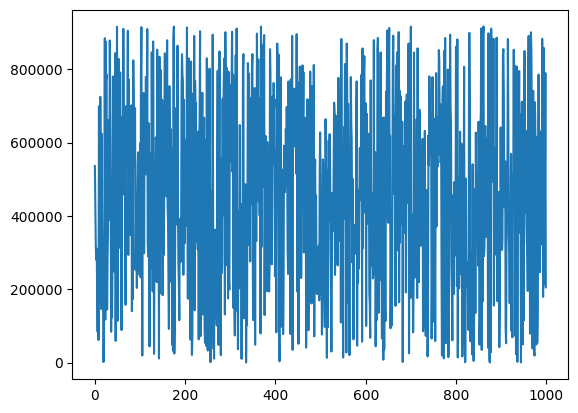

In [8]:
# Criando vetor de valores aleatórios
import numpy as np # Importa a biblioteca NumPy com o alias np, que será usada para gerar valores aleatórios.
atvMax = 917017
atvMin = 12
n = 1000 # 'n' Define o número de valores aleatórios a serem gerados.
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots() #Cria uma figura (fig) e um conjunto de eixos (ax) para o gráfico.
ax.plot(atv) #Plota os valores de atv no gráfico de linha.

In [9]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2024, 1, 1)
data_final = datetime(2024, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00


In [10]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
display(df)

,Data,Mes
0,2024-01-01,1
1,2024-01-02,1
2,2024-01-03,1
3,2024-01-04,1
4,2024-01-05,1
...,...,...
361,2024-12-27,12
362,2024-12-28,12
363,2024-12-29,12
364,2024-12-30,12


          Data  Mes      atividade      Atividade
0   2024-01-01    1  388131.395220  523042.711015
1   2024-01-02    1  221770.323793  274029.119188
2   2024-01-03    1  729244.249728  241727.063828
3   2024-01-04    1  532456.816045  737793.781838
4   2024-01-05    1  287365.046040  463905.998026
..         ...  ...            ...            ...
361 2024-12-27   12  839028.495157  669010.791622
362 2024-12-28   12  425076.242693  634788.898813
363 2024-12-29   12  407378.158743  671057.720061
364 2024-12-30   12  116074.044582  498208.898421
365 2024-12-31   12   82508.519422  431347.205946

[366 rows x 4 columns]


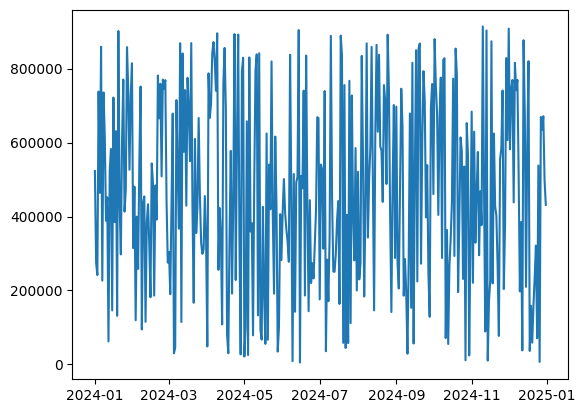

In [17]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['Atividade'] = atv #VERIFICAR PQ ESTÃO APARECENDO DUAS COLUNAS DE "ATIVIDADE"
#print(atv)
print (df)
# df.to_csv(r"C:\Users\Leonardo.Hoinaski\Documents\ENS5173_202401\tabelas\ativ.csv") salvar quando estiver certo


# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(datas, atv)

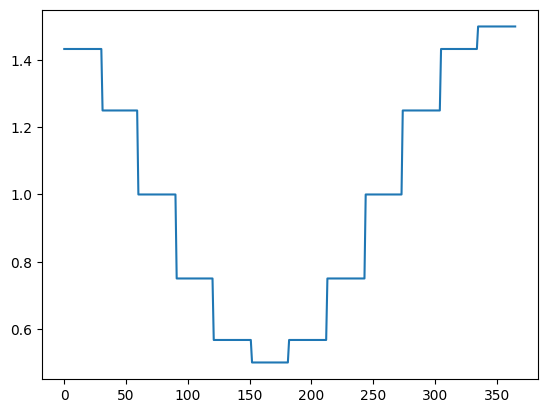

In [22]:
# Criando componente sazonal
sazonalidade = 0.5 * np.cos((2*np.pi)*df['Mes']/12) + 1  # Variação entre 0 e 2
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade

# df.to_csv(r"C:\Users\Leonardo.Hoinaski\Documents\ENS5173_202401\tabelas\ativ.csv")

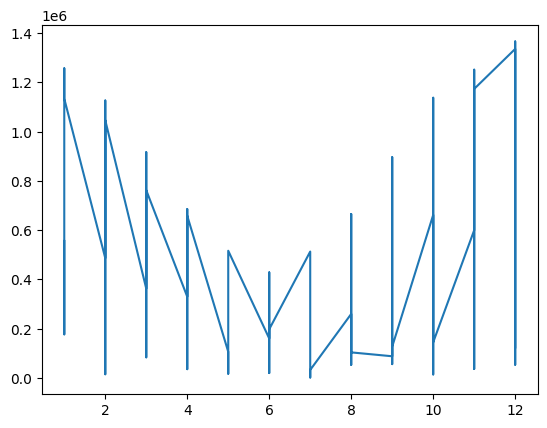

In [21]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 

plt.plot(df['Mes'], df['aleatorioSazonal'])